In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(np.mean(df['Age']),inplace=True)

In [8]:
df['Cabin'].fillna(df['Cabin'].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [9]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

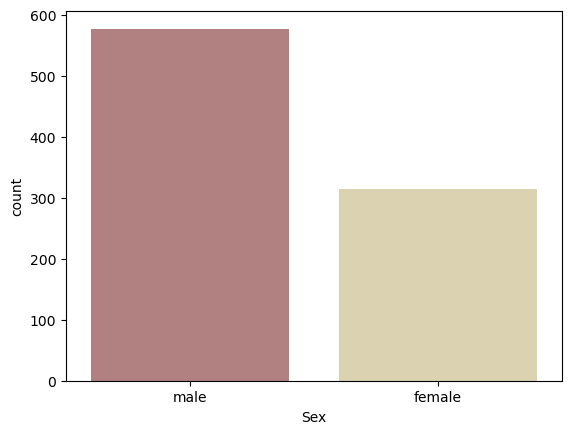

In [11]:
sns.countplot(x="Sex",data= df,palette="pink")
plt.show()

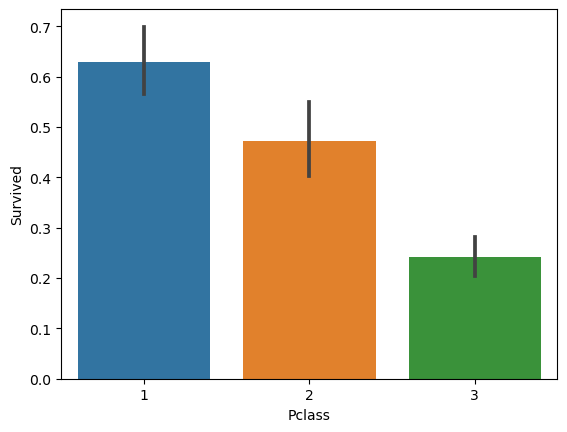

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

<Axes: ylabel='count'>

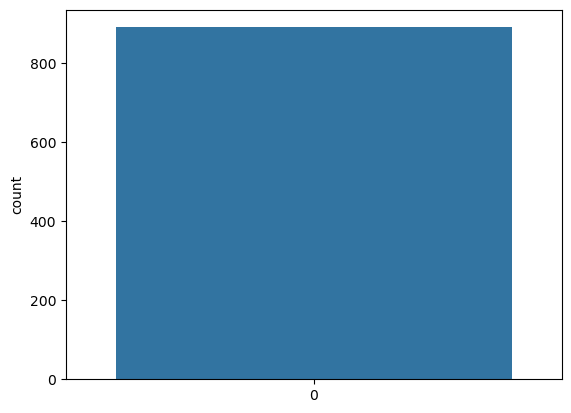

In [13]:
sns.countplot(df['Pclass'])

<Axes: >

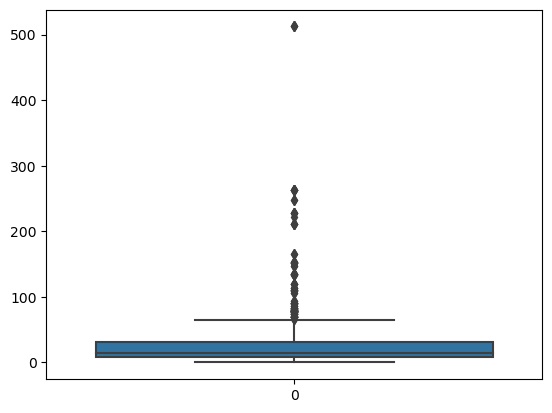

In [14]:
sns.boxplot(df['Fare'])

<Axes: >

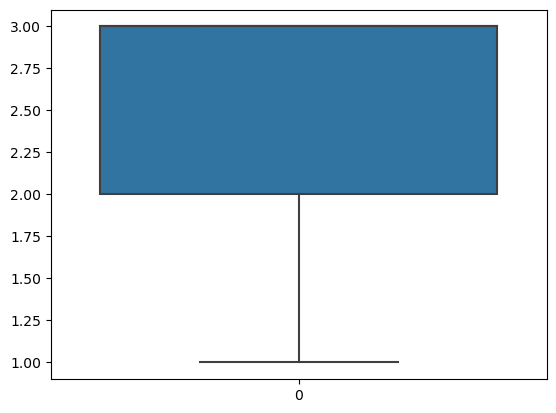

In [15]:
sns.boxplot(df['Pclass'])

<Axes: >

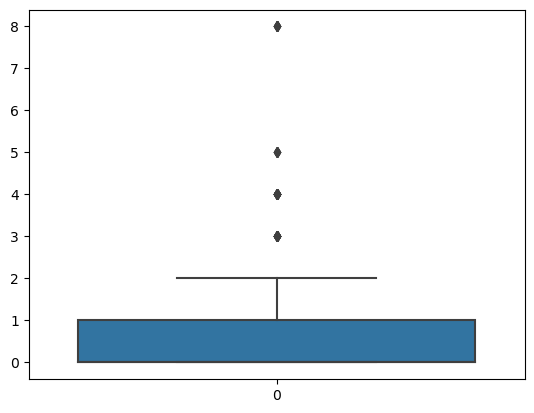

In [16]:
sns.boxplot(df['SibSp'])

<Axes: xlabel='Survived', ylabel='count'>

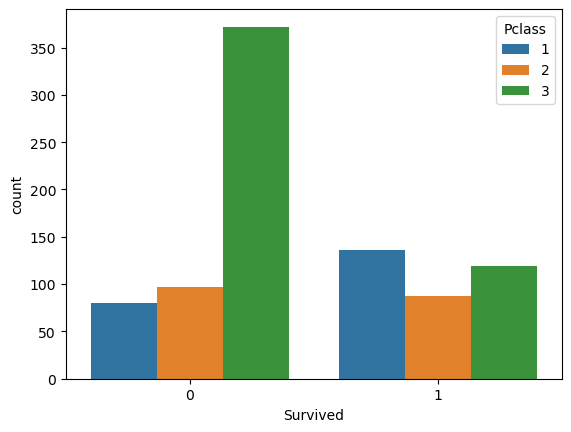

In [17]:
sns.countplot(x='Survived', hue='Pclass',data=df)

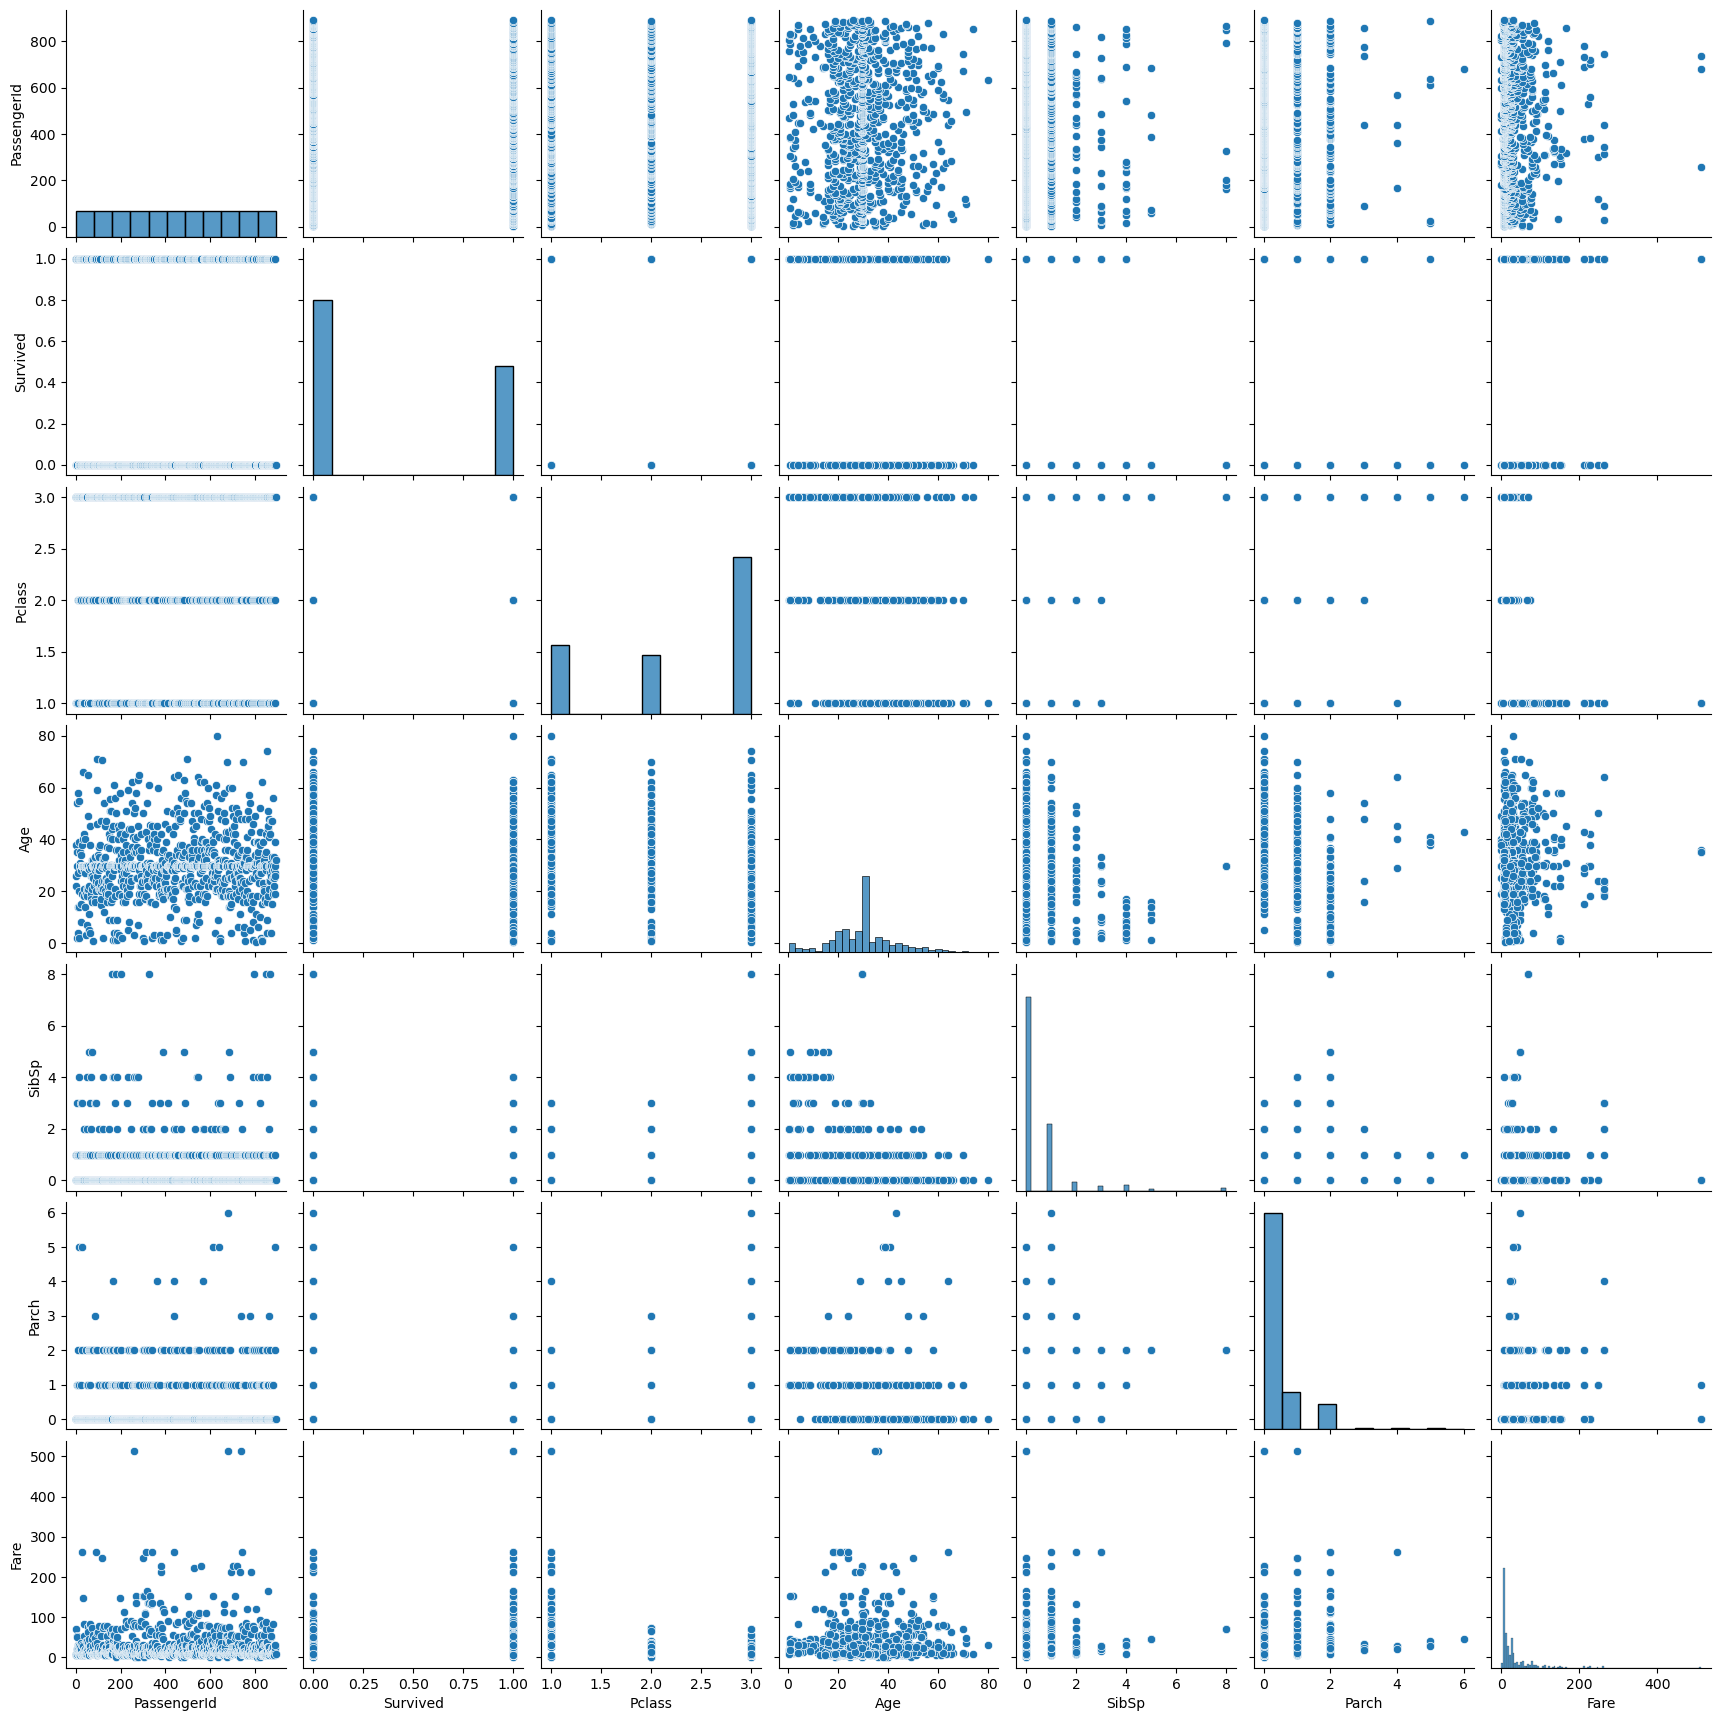

In [18]:
sns.pairplot(df)
plt.show()

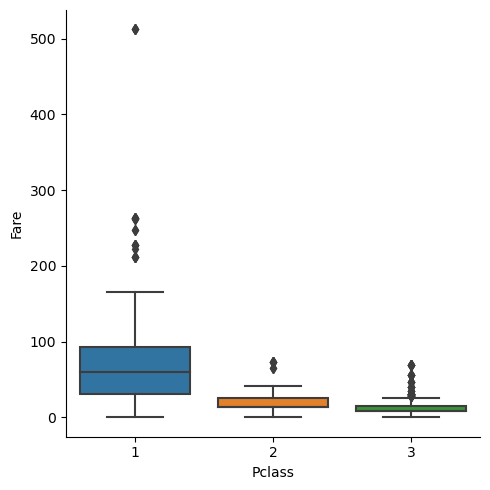

In [19]:
sns.catplot(x='Pclass', y='Fare', data=df,kind='box')

# 

## ML

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [21]:
df.replace({"Sex": {"male": 1, "female": 0},"Embarked": {"S":0, "C":1, "Q":2}}, inplace = True)

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1


In [23]:
x = df.drop(columns=["Name", "Ticket", "Survived","Cabin"], axis = 1)
y = df["Survived"]

In [24]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
x.shape

(891, 8)

In [27]:
y.shape

(891,)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state = 2)

### LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model= LogisticRegression() 
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
ypredtrain = model.predict(x_train)

Accuracy = accuracy_score(y_train,ypredtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(y_train,ypredtrain)
print('Confusion_matrix : \n',Confusion_matrix)

Classification_report = classification_report(y_train,ypredtrain)
print('Classification_report : \n',Classification_report)

Accuracy: 0.8047752808988764
Confusion_matrix : 
 [[390  59]
 [ 80 183]]
Classification_report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       449
           1       0.76      0.70      0.72       263

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [33]:

ypredtest = model.predict(x_test)

Accuracy = accuracy_score(y_test,ypredtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(y_test,ypredtest)
print('Confusion_matrix : \n',Confusion_matrix)

Classification_report = classification_report(y_test,ypredtest)
print('Classification_report : \n',Classification_report)

Accuracy: 0.7541899441340782
Confusion_matrix : 
 [[87 13]
 [31 48]]
Classification_report : 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.79      0.61      0.69        79

    accuracy                           0.75       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179



### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier 

In [35]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [36]:
randomforest = RandomForestClassifier() 
randomforest.fit(x_train, y_train) 

RandomForestClassifier()

In [43]:
ypred = randomforest.predict(x_test) 
r_acc = round(accuracy_score(ypred, y_test) * 100, 2) 
print(r_acc) 

78.21
